# Clase 17: Introducción al análisis de texto (text mining)
En esta clase veremos una introducción al procesamiento de texto. Para esto utilizaremos un discurso presidencial y veremos como depurar este texto, de manera que podamos extraer información relevante. 

Vamos a 
- Examinar el texto
- Depurar: 
    - Remover símbolos
    - Remover números
    - Mayúscula-minúscula
    - Espacios en blanco
    - Tíldes
- Tokenizar
- Frecuencias de palabras
- Stopwords
- Wordclouds
- Stemming
- N-gramas

## 1. Introducción

En el mundo moderno tenemos muchas fuentes de información, la tarea es cómo la recopilamos, procesamos y analizamos. 
Por ejemplo, las frases, textos, libros, comentarios en redes sociales, son una amplia gama de fuentes de información. El `text mining` es "obtener información interesante y no trivial de textos o información no estructurada". 

Ejemplos de información que podemos recopilar y procesar: 
- Noticias de diarios electrónicos
- Libros
- Twitter
- etc.


Para efectos de esta clase, veremos la librería `nltk` (Natural Language Toolkit), que proporciona una potente herramienta de manejo de texto. 

In [6]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re
import nltk
# nltk.download('punkt')
# import nltk.corpus
# from nltk.tokenize import word_tokenize

Vamos a importar un archivo .txt

In [7]:
#Discurso 1
# discurso1 = open('C:\\Users\\ordon\\Dropbox\\Computational_Economics\\Intro_python\\Data_text_proc\\discurso1.txt', 'r') 
discurso1 = open('/home/felix/Dropbox/Computational_Economics/Intro_python/Data_text_proc/discurso1.txt', 'r', encoding="latin-1") 




discurso1 = discurso1.read()
discurso1

'S.E. la Presidenta de la República, Michelle Bachelet, asiste al lanzamiento de la campaña \x93Chile necesita más médicos y especialistas. Incorpórate al Sistema Público de Salud\x94\nAmigas y amigos:\n\nQué duda cabe, la verdad, como señala esta campaña del Ministerio de Salud, que \x93Chile necesita más Médicos y Especialistas\x94 en el sector público. Y es una necesidad de nuestra sociedad, y estamos dando pasos concretos para poder satisfacer esta necesidad.\n\nY uno de los grandes objetivos que tenemos como Gobierno es, justamente, mejorar la atención de salud que recibe nuestra población.\n\nY una de nuestras preocupaciones centrales es justamente fortalecer y asegurar la capacidad del Estado para responder de manera más rápida y más integral a las necesidades de millones de nuestros compatriotas que utilizan la red pública de consultorios, hospitales, centros de salud familiar y los servicios de urgencia. \n\nLa calidad de vida en nuestro país depende fuertemente de la capacida

## Examinar texto

In [8]:
discurso1[0:1000]

'S.E. la Presidenta de la República, Michelle Bachelet, asiste al lanzamiento de la campaña \x93Chile necesita más médicos y especialistas. Incorpórate al Sistema Público de Salud\x94\nAmigas y amigos:\n\nQué duda cabe, la verdad, como señala esta campaña del Ministerio de Salud, que \x93Chile necesita más Médicos y Especialistas\x94 en el sector público. Y es una necesidad de nuestra sociedad, y estamos dando pasos concretos para poder satisfacer esta necesidad.\n\nY uno de los grandes objetivos que tenemos como Gobierno es, justamente, mejorar la atención de salud que recibe nuestra población.\n\nY una de nuestras preocupaciones centrales es justamente fortalecer y asegurar la capacidad del Estado para responder de manera más rápida y más integral a las necesidades de millones de nuestros compatriotas que utilizan la red pública de consultorios, hospitales, centros de salud familiar y los servicios de urgencia. \n\nLa calidad de vida en nuestro país depende fuertemente de la capacida

## 2. Depurar
El proceso de depurar implica remover o cambiar elementos que no son palabras y que para efectos del análisis del texto puedan ser irrelevantes. 

Vamos a: 
- Remover símbolos: Los textos pueden venir con variados símbolos como ",+,\,<,@, entre otros. 
- Remover números: hay que evaluar si los números van a ser relevantes a la hora del texto que queremos analizar. En caso que no lo sean, los vamos a quitar. 
- Llevar a minúscula: Hola y hola, para efectos del análisis de texto son equivalentes. Por eso llevamos todo a minúsculas. 
- Eliminar espacios en blanco innecesarios: vamos a borrar  cuando hay más de un espacio.
- Eliminar tildes: para el análisis de texto podemos eliminar las tildes, para que palabras como analisis y análisis sean equivalentes.
- Borrar saltos de línea. 

### Remover Símbolos

In [9]:
import re
regex = '[\\!\\“\\”\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
nuevo_discurso = re.sub(regex, ' ', discurso1)
print(nuevo_discurso[0:2000])

S E  la Presidenta de la República  Michelle Bachelet  asiste al lanzamiento de la campaña Chile necesita más médicos y especialistas  Incorpórate al Sistema Público de Salud
Amigas y amigos 

Qué duda cabe  la verdad  como señala esta campaña del Ministerio de Salud  que Chile necesita más Médicos y Especialistas en el sector público  Y es una necesidad de nuestra sociedad  y estamos dando pasos concretos para poder satisfacer esta necesidad 

Y uno de los grandes objetivos que tenemos como Gobierno es  justamente  mejorar la atención de salud que recibe nuestra población 

Y una de nuestras preocupaciones centrales es justamente fortalecer y asegurar la capacidad del Estado para responder de manera más rápida y más integral a las necesidades de millones de nuestros compatriotas que utilizan la red pública de consultorios  hospitales  centros de salud familiar y los servicios de urgencia  

La calidad de vida en nuestro país depende fuertemente de la capacidad que tengamos para  o

### Remover números

In [10]:
nuevo_discurso = re.sub('\d+', ' ', nuevo_discurso)
print(nuevo_discurso[0:2000])

S E  la Presidenta de la República  Michelle Bachelet  asiste al lanzamiento de la campaña Chile necesita más médicos y especialistas  Incorpórate al Sistema Público de Salud
Amigas y amigos 

Qué duda cabe  la verdad  como señala esta campaña del Ministerio de Salud  que Chile necesita más Médicos y Especialistas en el sector público  Y es una necesidad de nuestra sociedad  y estamos dando pasos concretos para poder satisfacer esta necesidad 

Y uno de los grandes objetivos que tenemos como Gobierno es  justamente  mejorar la atención de salud que recibe nuestra población 

Y una de nuestras preocupaciones centrales es justamente fortalecer y asegurar la capacidad del Estado para responder de manera más rápida y más integral a las necesidades de millones de nuestros compatriotas que utilizan la red pública de consultorios  hospitales  centros de salud familiar y los servicios de urgencia  

La calidad de vida en nuestro país depende fuertemente de la capacidad que tengamos para  o

### Convertir a minúscula

In [11]:
nuevo_discurso = nuevo_discurso.lower()
print(nuevo_discurso[0:100])

s e  la presidenta de la república  michelle bachelet  asiste al lanzamiento de la campaña chile ne


### Eliminar espacios en blanco innecesarios

In [12]:
nuevo_discurso = re.sub("\\s+", ' ', nuevo_discurso)
print(nuevo_discurso[0:100])

s e la presidenta de la república michelle bachelet asiste al lanzamiento de la campaña chile neces


### Eliminar tildes y líneas en blanco
- Eliminar diacríticos: tíldes y símbolos como ¨, ^, ...
- NFC: https://docs.python.org/3/library/unicodedata.html#unicodedata.normalize


In [13]:
from unicodedata import normalize


# -> NFD y eliminar diacríticos
nuevo_discurso = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", nuevo_discurso), 0, re.I
    )

# -> NFC
nuevo_discurso = normalize( 'NFC', nuevo_discurso)
print(nuevo_discurso[0:200])

s e la presidenta de la republica michelle bachelet asiste al lanzamiento de la campaña chile necesita mas medicos y especialistas incorporate al sistema publico de salud amigas y amigos que duda ca


## 3. Tokenizar
Tokenizar significa dividir el texto en una unidad más pequeña, donde cada una de estas unidades va a ser un `token`.
Por ejemplo, podemos `tokenizar` texto anterior en oraciones o en palabras: 
- Oraciones: 
    - token 1 = Tokenizar significa dividir el texto en una unidad más pequeña
    - token 2 = donde cada una de estas unidades va a ser un `token`
- Palabras: 
    - token 1 = Tokenizar
    - token 2 = significa
    - token 3 = dividir
    - ...
    
En nuestro ejemplo vamos a `tokenizar` en base a palabras. 

In [14]:
from nltk.tokenize import word_tokenize
token = word_tokenize(nuevo_discurso)
print(token[0:10])

['s', 'e', 'la', 'presidenta', 'de', 'la', 'republica', 'michelle', 'bachelet', 'asiste']


## 4. Frecuencia de palabras
Uno de los primeros análisis que se puede realizar a partir de un texto, es la frecuencia por palabra, es decir cuántas veces se encuentra cada palabra dentro del texto. 

In [15]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'de': 100, 'que': 62, 'y': 50, 'la': 48, 'en': 35, 'a': 31, 'el': 26, 'los': 25, 'las': 18, 'medicos': 17, ...})

In [16]:
# To find the frequency of top 10 words
fdist1 = fdist.most_common(10)
fdist1

[('de', 100),
 ('que', 62),
 ('y', 50),
 ('la', 48),
 ('en', 35),
 ('a', 31),
 ('el', 26),
 ('los', 25),
 ('las', 18),
 ('medicos', 17)]

## 5. Stopwords
En el ejemplo anterior vemos que las palabras más frecuentes son "de", "que", "y", etc. Palabras que no aportan al análisis del texto, sino que son conectores, prepocisiones. Estas palabras son llamadas `stopwords`. 

Para cada idioma existe un listado de `stopwords` y, dependiendo del contexto, se pueden ir modificando. 

In [17]:
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = list(stopwords.words('spanish'))
print(stop_words[0:10])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']


In [18]:
token_sw = [x for x in token if x not in stop_words]
print(token_sw[0:10])

['s', 'presidenta', 'republica', 'michelle', 'bachelet', 'asiste', 'lanzamiento', 'campaña', '\x93chile', 'necesita']


In [19]:
fdist = FreqDist(token_sw)
fdist1 = fdist.most_common(10)
fdist1

[('medicos', 17),
 ('salud', 13),
 ('mil', 12),
 ('mas', 11),
 ('atencion', 8),
 ('publico', 7),
 ('formacion', 7),
 ('cupos', 7),
 ('especialistas', 6),
 ('medico', 6)]

## 6. Wordclouds

Una de las visualizaciones clásicas del análisis de texto, es una representación visual de la frecuencia de palabas mediante una nube de palabras (wordclouds). 

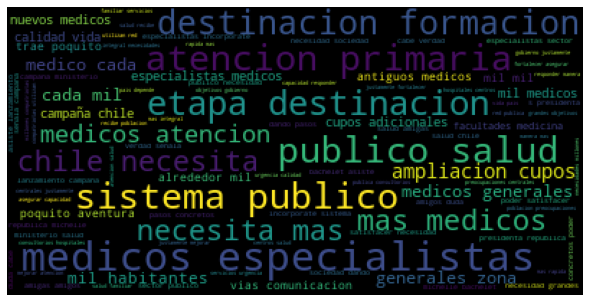

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

comment_words = ''
for i in range(len(token_sw)):
    comment_words += " ".join(token_sw)+" "
    
wordcloud = WordCloud().generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

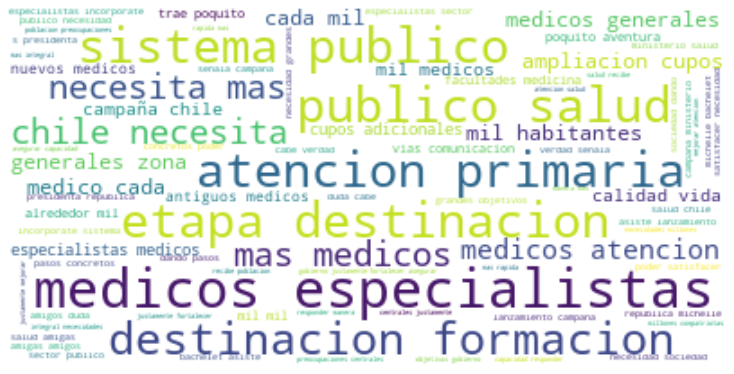

In [21]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(comment_words)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
# plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## 7. Stemming
`Stemming` (derivado de) corresponde a una normalización de palabras llevandolas a la raíz. Por ejemplo las palabras médicos, medicas, médico, médica se pueden agrupar dentro de `medic`. Luego, en un procesamiento de información nos va ayudar a tener información más depurada. 

Sin embargo, tenemos que tener precaución con estas reducciones de significado. Por ejemplo, un paquete podría reducir médico a medic y medicina a medicin, mientras que otro más agresivo podría llevar ambos conceptos a medic. Naturalmente, para efectos del análisis de la información los resultados pueden ser muy variados. 


In [22]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

stemmer.stem('medico')

'medic'

In [23]:
token_st =[stemmer.stem(x) for x in token_sw]
token_st[0:10]

['s',
 'president',
 'republ',
 'michell',
 'bachelet',
 'asist',
 'lanzamient',
 'campañ',
 '\x93chil',
 'necesit']

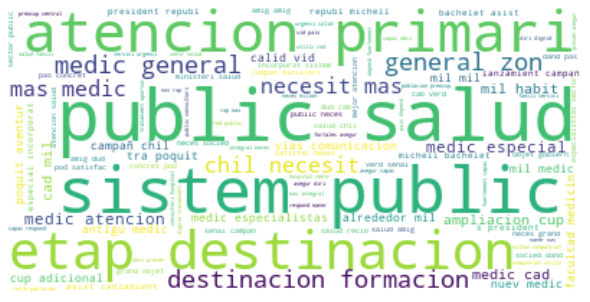

In [24]:
comment_words = ''
for i in range(len(token_st)):
    comment_words += " ".join(token_st)+" "
    
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
# plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## 8. N-gramas
Podemos escribir "el computador está apagado", pero sería incorrecto decir "apagado el está computador". En este contexto, los N-gramas con estructuras de palabras que se suceden. 

Por ejemplo: 
 - Bi-grama: (el, computador), (computador, está)
 - Tri-grama: (el, computador, está), (computador, está, apagado)
 
Capturamos cierto significado de un conjunto de palabras. 

In [25]:
from nltk import ngrams

sentence = 'this is a foo bar sentences and i want to ngramize it'

n = 3
n2grams = ngrams(nuevo_discurso.split(), n)

In [26]:
from nltk.probability import FreqDist
fdist = FreqDist(n2grams)
fdist

FreqDist({('sistema', 'publico', 'de'): 4, ('la', 'atencion', 'primaria'): 4, ('etapa', 'de', 'destinacion'): 4, ('de', 'destinacion', 'y'): 4, ('destinacion', 'y', 'formacion'): 4, ('\x93chile', 'necesita', 'mas'): 3, ('necesita', 'mas', 'medicos'): 3, ('mas', 'medicos', 'y'): 3, ('la', 'calidad', 'de'): 3, ('en', 'nuestro', 'pais'): 3, ...})

In [27]:
fdist1 = fdist.most_common(10)

x=[]
y=[]
for i in fdist1:
    x.append(str(i[0]))
    y.append(i[1])
print(x[0])

('sistema', 'publico', 'de')


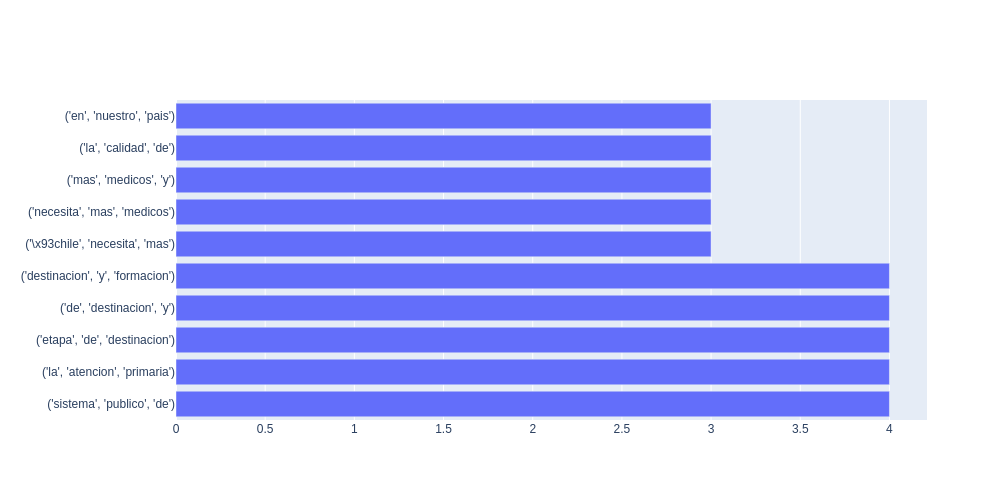

In [28]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h'))

fig.update_layout(width=700, height=500)
fig.show()